# Predictive Analytics Project  

## Step 1: Import Required Libraries

In [110]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import clone

# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# General settings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")


## Step 2: Load the Dataset

In [111]:
# Load the hotel booking dataset
df = pd.read_csv("/content/hotel_bookings.csv")

## Step 3: Initial Data Inspection

### Step 3.1: Basic Dataset Information

In [112]:
print("========== BASIC INFO ==========")
print("Shape (rows, cols):", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nColumn data types (counts):")
display(df.dtypes.value_counts())

print("\nFull info:")
df.info()


========== BASIC INFO ==========
Shape (rows, cols): (119390, 32)

First 5 rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



Column data types (counts):


,count
int64,16
object,12
float64,4



Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal

### Step 3.2: Identify Numeric and Categorical Features

In [113]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("========== FEATURE TYPES ==========")
print("Numeric columns:", len(num_cols))
print("Categorical/Boolean columns:", len(cat_cols))

print("\nSample numeric columns:", num_cols[:15])
print("Sample categorical columns:", cat_cols[:15])


========== FEATURE TYPES ==========
Numeric columns: 20
Categorical/Boolean columns: 12

Sample numeric columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent']
Sample categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


### Step 3.3: Missing Values Analysis: Missing values count and percentage

========== MISSING VALUES ==========


,MissingCount,MissingPercent
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
hotel,0,0.000000
is_canceled,0,0.000000
stays_in_weekend_nights,0,0.000000
arrival_date_day_of_month,0,0.000000



Total missing values in dataset: 129425


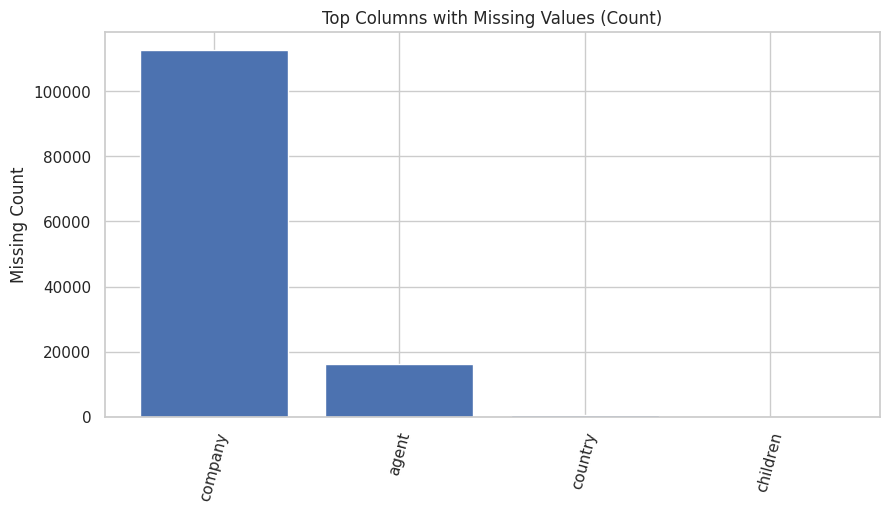

In [114]:
print("========== MISSING VALUES ==========")

missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    "MissingCount": missing_counts,
    "MissingPercent": missing_pct
}).sort_values(by="MissingCount", ascending=False)

display(missing_summary.head(30))
print("\nTotal missing values in dataset:", missing_counts.sum())

# Optional visualization (Top 15 missing columns)
top_missing = missing_summary[missing_summary["MissingCount"] > 0].head(15)

if len(top_missing) > 0:
    plt.figure(figsize=(10, 5))
    plt.bar(top_missing.index, top_missing["MissingCount"])
    plt.title("Top Columns with Missing Values (Count)")
    plt.xticks(rotation=75)
    plt.ylabel("Missing Count")
    plt.show()
else:
    print("No missing values found.")


### Step 3.4: Duplicate Records Check

In [115]:
print("========== DUPLICATES ==========")

dup_count = df.duplicated().sum()
print("Duplicate rows (exact duplicates):", dup_count)

# optional: view duplicates
if dup_count > 0:
    print("\nSample duplicate rows:")
    display(df[df.duplicated()].head())


========== DUPLICATES ==========
Duplicate rows (exact duplicates): 31994

Sample duplicate rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08


### Step 3.5: Outlier Detection (IQR + Boxplot)

========== OUTLIERS (IQR) ==========


,Column,OutlierCount
7,adults,29710
13,booking_changes,18076
8,children,8590
18,required_car_parking_spaces,7416
11,previous_cancellations,6484
17,adr,3793
16,days_in_waiting_list,3698
12,previous_bookings_not_canceled,3620
6,stays_in_week_nights,3354
1,lead_time,3005



Total numeric columns with >0 outliers: 13


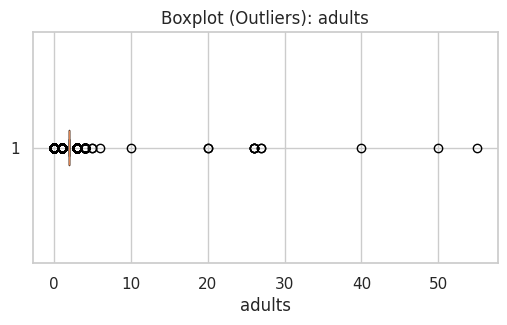

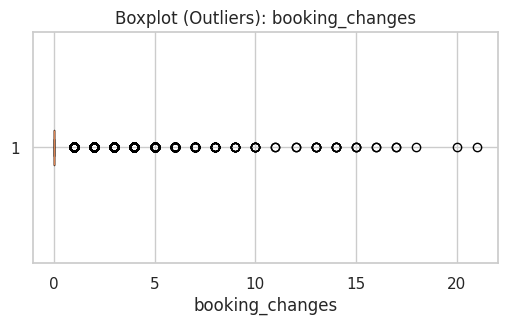

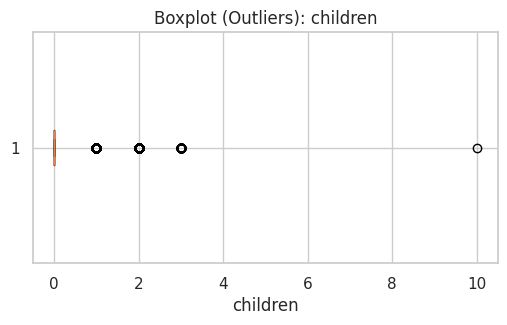

In [116]:
print("========== OUTLIERS (IQR) ==========")

def iqr_outlier_count(series):
    series = series.dropna()
    if series.nunique() < 5:
        return 0
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

outlier_report = []
for col in num_cols:
    outliers = iqr_outlier_count(df[col])
    outlier_report.append((col, outliers))

outlier_df = pd.DataFrame(outlier_report, columns=["Column", "OutlierCount"])\
               .sort_values(by="OutlierCount", ascending=False)

display(outlier_df.head(30))
print("\nTotal numeric columns with >0 outliers:", (outlier_df["OutlierCount"] > 0).sum())

# Boxplot for top 3 outlier-heavy numeric columns
top_outlier_cols = outlier_df[outlier_df["OutlierCount"] > 0]["Column"].head(3).tolist()
if len(top_outlier_cols) > 0:
    for c in top_outlier_cols:
        plt.figure(figsize=(6, 3))
        plt.boxplot(df[c].dropna(), vert=False)
        plt.title(f"Boxplot (Outliers): {c}")
        plt.xlabel(c)
        plt.show()
else:
    print("No strong outliers detected by IQR rule in numeric columns.")



## Step 3.6: Target Variable Selection for regression

Target Variable: ADR (Average Daily Rate)
Data type: float64
Number of unique values: 8879
Missing values: 0


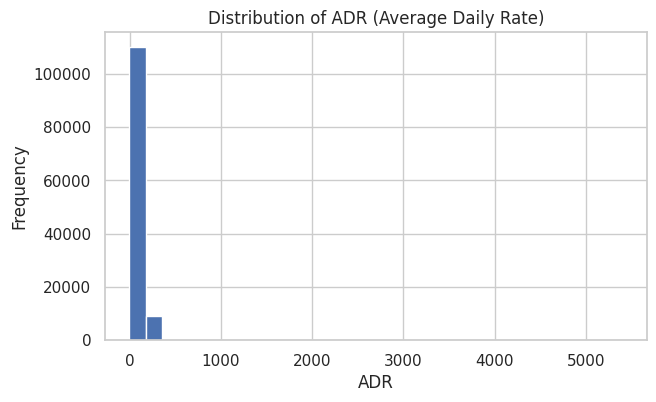

In [117]:
print("Target Variable: ADR (Average Daily Rate)")
print("Data type:", df["adr"].dtype)
print("Number of unique values:", df["adr"].nunique())
print("Missing values:", df["adr"].isnull().sum())

plt.figure(figsize=(7, 4))
df["adr"].dropna().hist(bins=30)
plt.title("Distribution of ADR (Average Daily Rate)")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.show()


### Why ADR Was Selected as the Target Variable?

Because ADR (Average Daily Rate) is a key pricing and revenue metric in the hotel industry.
Predicting ADR allows hotels to understand how booking characteristics influence room prices.


# Step 4: Descriptive Statistical Analysis

## Step 4.1: Descriptive Statistics (Numeric Variables)

In [118]:
# Select numeric columns
numeric_df = df[num_cols]

# Basic descriptive statistics
desc_stats = numeric_df.describe().T

# Add additional statistics
desc_stats["Median"] = numeric_df.median()
desc_stats["Mode"] = numeric_df.mode().iloc[0]
desc_stats["Variance"] = numeric_df.var()
desc_stats["Range"] = numeric_df.max() - numeric_df.min()
desc_stats["Skewness"] = numeric_df.skew()
desc_stats["Kurtosis"] = numeric_df.kurtosis()

display(desc_stats)


,count,mean,std,min,25%,50%,75%,max,Median,Mode,Variance,Range,Skewness,Kurtosis
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0,0.000,0.0,0.233210,1.00,0.536678,-1.712005
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0,69.000,0.0,11419.721511,737.00,1.346550,1.696449
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0,2016.000,2016.0,0.500522,2.00,-0.232583,-0.994564
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0,28.000,33.0,185.099790,52.00,-0.010014,-0.986077
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0,16.000,17.0,77.102966,30.00,-0.002000,-1.187168
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0,1.000,0.0,0.997229,19.00,1.380046,7.174066
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0,2.000,2.0,3.641554,50.00,2.862249,24.284555
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0,2.000,2.0,0.335543,55.00,18.317805,1352.115116
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0,0.000,0.0,0.158851,10.00,4.112590,18.673692
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0,0.000,0.0,0.009494,10.00,24.646545,1633.948235



## Step 4.2: Descriptive Statistics for Target Variable (ADR)


In [119]:
TARGET = "adr"

display(df[TARGET].describe())


,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


## Step 4.3: Distribution of Target Variable (ADR)

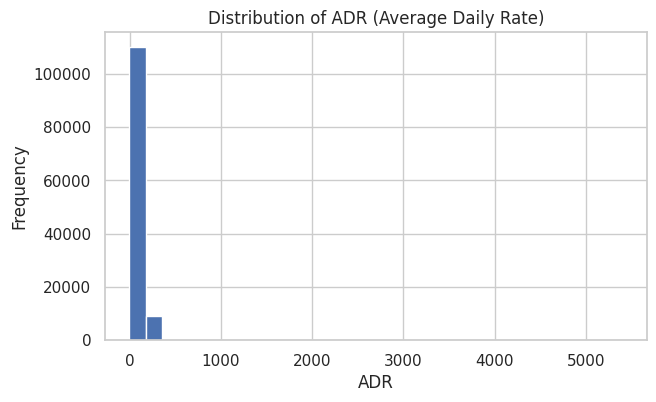

In [120]:
plt.figure(figsize=(7, 4))
plt.hist(df[TARGET].dropna(), bins=30)
plt.title("Distribution of ADR (Average Daily Rate)")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.show()


## Step 4.4: Correlation Analysis

In [121]:
# Correlation matrix
corr_matrix = numeric_df.corr()

display(corr_matrix)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


## Step 4.5: Correlation of Features with Target Variable (ADR)

In [122]:
corr_with_target = corr_matrix[TARGET].sort_values(ascending=False)

display(corr_with_target)


,adr
adr,1.000000
children,0.324854
adults,0.230641
arrival_date_year,0.197580
total_of_special_requests,0.172185
company,0.086376
arrival_date_week_number,0.075791
stays_in_week_nights,0.065237
required_car_parking_spaces,0.056628
stays_in_weekend_nights,0.049342


## Step 4.6: Correlation Heatmap

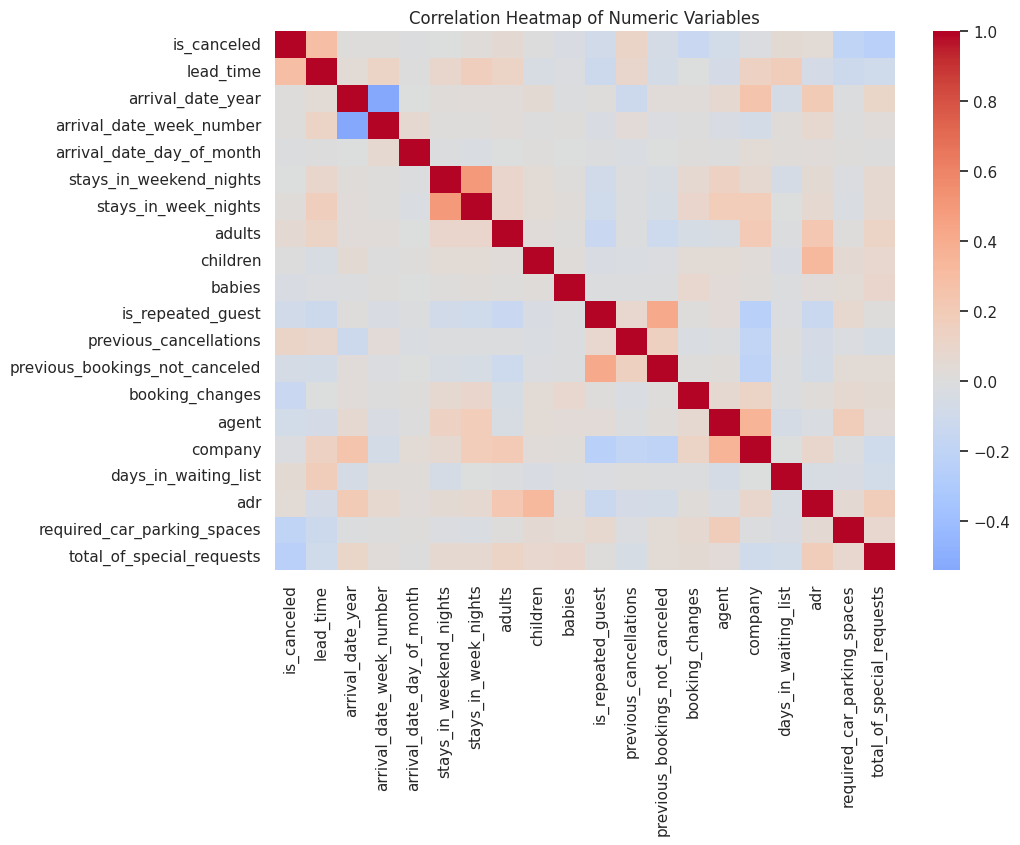

In [123]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


# Step 5: Exploratory Data Analysis (EDA)

ADR Summary by Hotel Type:


,count,mean,median
hotel,,,
City Hotel,79330,105.304465,99.9
Resort Hotel,40060,94.952930,75.0


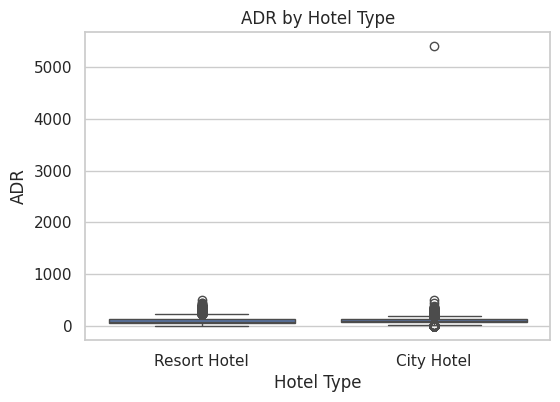

ADR Summary by Market Segment:


,count,mean,median
market_segment,,,
Online TA,56477,117.197063,109.8
Direct,12606,115.445175,105.0
Aviation,237,100.142110,95.0
Offline TA/TO,24219,87.354783,85.5
Groups,19811,79.479472,70.0
Corporate,5295,69.358952,65.0
Undefined,2,15.000000,15.0
Complementary,743,2.886366,0.0


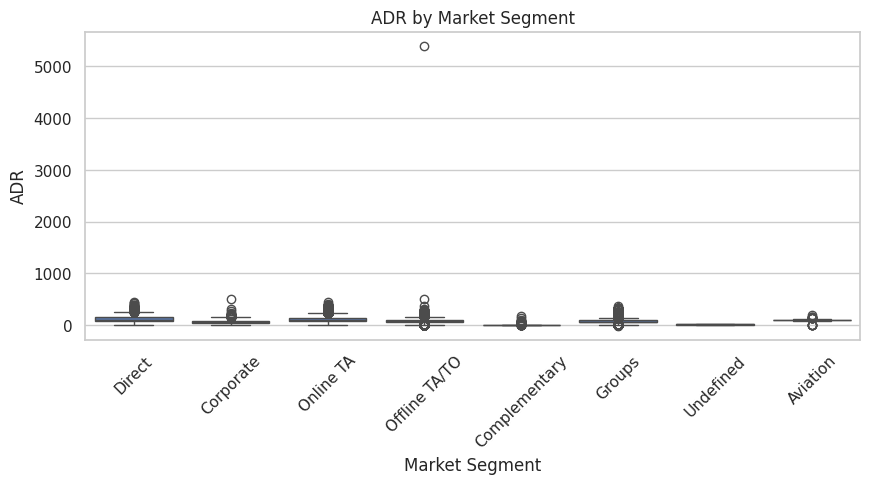

Correlation between ADR and Lead Time:
-0.06307685251681928


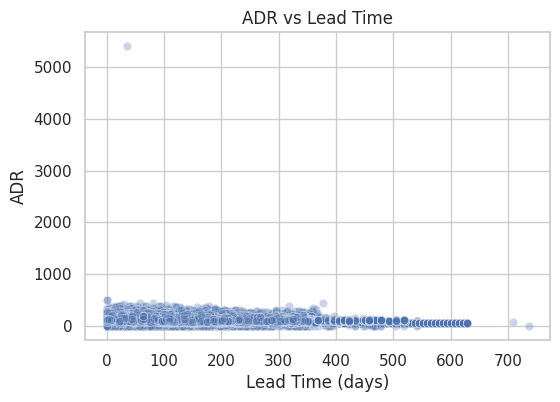

ADR Summary by Total Stay Nights (showing first 12 groups):


,count,mean,median
total_stay_nights,,,
0,715,0.000000,0.00
1,21020,94.697787,89.00
2,27643,97.723088,91.00
3,27076,105.152492,98.00
4,17383,104.970035,97.88
5,7784,113.223704,103.00
6,3857,119.876025,110.00
7,8655,103.422341,89.10
8,1161,113.954574,104.40


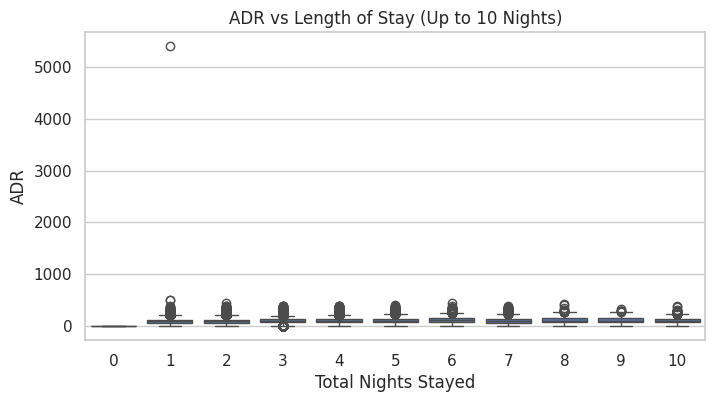

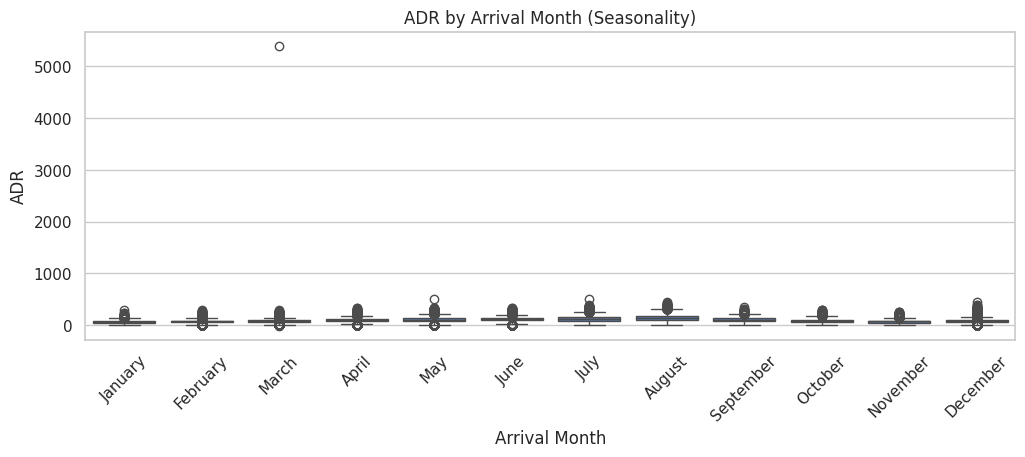

ADR Summary by Customer Type:


,count,mean,median
customer_type,,,
Contract,4076,87.549637,82.87
Group,577,83.488579,75.00
Transient,89613,107.013621,99.00
Transient-Party,25124,86.084253,81.00


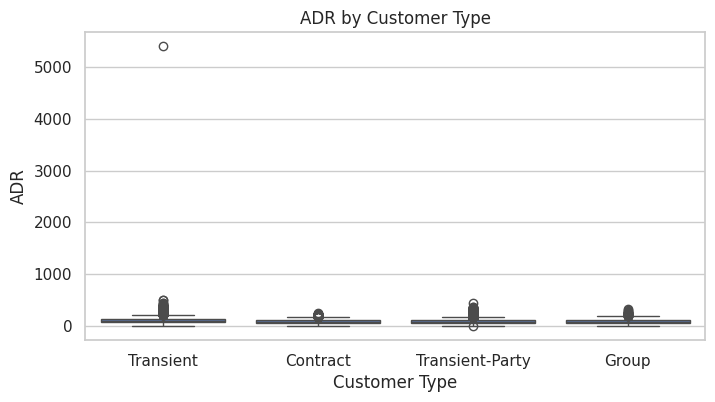

In [124]:
# ---------- ADR vs Hotel Type ----------
print("ADR Summary by Hotel Type:")
display(df.groupby("hotel")["adr"].agg(["count", "mean", "median"]))

plt.figure(figsize=(6, 4))
sns.boxplot(x="hotel", y="adr", data=df)
plt.title("ADR by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.show()


# ---------- ADR vs Market Segment ----------
print("ADR Summary by Market Segment:")
display(
    df.groupby("market_segment")["adr"].agg(["count", "mean", "median"])
      .sort_values("mean", ascending=False)
)

plt.figure(figsize=(10, 4))
sns.boxplot(x="market_segment", y="adr", data=df)
plt.xticks(rotation=45)
plt.title("ADR by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("ADR")
plt.show()


# ---------- ADR vs Lead Time ----------
print("Correlation between ADR and Lead Time:")
print(df["adr"].corr(df["lead_time"]))

plt.figure(figsize=(6, 4))
sns.scatterplot(x="lead_time", y="adr", data=df, alpha=0.3)
plt.title("ADR vs Lead Time")
plt.xlabel("Lead Time (days)")
plt.ylabel("ADR")
plt.show()


# ---------- ADR vs Length of Stay (Fixed for readability) ----------
df["total_stay_nights"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]

print("ADR Summary by Total Stay Nights (showing first 12 groups):")
display(df.groupby("total_stay_nights")["adr"].agg(["count", "mean", "median"]).head(12))

# Focus on common stays only (0–10 nights) for clear visualization
filtered_df = df[df["total_stay_nights"] <= 10]

plt.figure(figsize=(8, 4))
sns.boxplot(x="total_stay_nights", y="adr", data=filtered_df)
plt.title("ADR vs Length of Stay (Up to 10 Nights)")
plt.xlabel("Total Nights Stayed")
plt.ylabel("ADR")
plt.show()


# ---------- ADR vs Arrival Month (Seasonality) ----------
plt.figure(figsize=(12, 4))
sns.boxplot(
    x="arrival_date_month",
    y="adr",
    data=df,
    order=["January","February","March","April","May","June",
           "July","August","September","October","November","December"]
)
plt.xticks(rotation=45)
plt.title("ADR by Arrival Month (Seasonality)")
plt.xlabel("Arrival Month")
plt.ylabel("ADR")
plt.show()


# ---------- ADR vs Customer Type ----------
print("ADR Summary by Customer Type:")
display(df.groupby("customer_type")["adr"].agg(["count", "mean", "median"]))

plt.figure(figsize=(8, 4))
sns.boxplot(x="customer_type", y="adr", data=df)
plt.title("ADR by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("ADR")
plt.show()



Exploratory Data Analysis revealed strong relationships between booking characteristics
and ADR, motivating the use of non-linear models.


# Step 6: Data Preprocessing

## Step 6.1: Handling Duplicate Records


In [125]:
# Check duplicates
print("Number of duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("Number of duplicate rows after removal:", df.duplicated().sum())
print("Dataset shape after duplicate removal:", df.shape)


Number of duplicate rows before removal: 31994
Number of duplicate rows after removal: 0
Dataset shape after duplicate removal: (87396, 33)


## Step 6.2: Handling Missing Values


In [126]:
# Check missing values before imputation
df.isnull().sum().sort_values(ascending=False).head(10)


,0
company,82137
agent,12193
country,452
children,4
hotel,0
arrival_date_week_number,0
arrival_date_day_of_month,0
is_canceled,0
lead_time,0
stays_in_week_nights,0


In [127]:
# Impute missing values

# Children: replace missing with 0 (no children)
df["children"] = df["children"].fillna(0)

# Country: replace missing with mode
df["country"] = df["country"].fillna(df["country"].mode()[0])

# Agent & Company: replace missing with 0 (means 'not applicable')
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)

# Verify
df.isnull().sum().sort_values(ascending=False).head(10)


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### Step 6.3: Outlier Treatment


In [128]:
# IQR-based capping for ADR
Q1 = df["adr"].quantile(0.25)
Q3 = df["adr"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["adr"] = df["adr"].clip(lower_bound, upper_bound)

print("ADR outliers capped using IQR method.")


ADR outliers capped using IQR method.


At this stage, the dataset was cleaned, transformed, and prepared for analysis.
Missing values, duplicates, and outliers were handled to ensure data quality.


## Step 7: Feature Engineering


In this step, new features were created based on domain knowledge and insights obtained from EDA to improve model performance.


In [129]:
# 1. Total length of stay
df["total_stay_nights"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]

# 2. Total number of guests
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

# 3. Indicator for family booking
df["is_family"] = np.where(df["total_guests"] > 1, 1, 0)

# 4. Indicator for presence of children
df["has_children"] = np.where(df["children"] > 0, 1, 0)

# 5. Weekend stay indicator
df["is_weekend_stay"] = np.where(df["stays_in_weekend_nights"] > 0, 1, 0)

# 6. Booking month as numeric
month_map = {
    "January":1, "February":2, "March":3, "April":4,
    "May":5, "June":6, "July":7, "August":8,
    "September":9, "October":10, "November":11, "December":12
}
df["booking_month"] = df["arrival_date_month"].map(month_map)

# 7. Booking quarter
df["booking_quarter"] = df["booking_month"].apply(
    lambda x: 1 if x<=3 else 2 if x<=6 else 3 if x<=9 else 4
)

print("Feature engineering completed.")


Feature engineering completed.


In [130]:
# Data Check After Feature Engineering

# Updated dataset shape
print("Dataset shape after feature engineering:", df.shape)

# Check new columns
new_features = [
    "total_stay_nights", "total_guests", "is_family",
    "has_children", "is_weekend_stay",
    "booking_month", "booking_quarter"
]

print("\nNew engineered features:")
display(df[new_features].head())

# Check missing values again
print("\nMissing values after feature engineering:")
display(df.isnull().sum().sort_values(ascending=False).head(10))

# Check data types
print("\nData types of new features:")
display(df[new_features].dtypes)


Dataset shape after feature engineering: (87396, 39)

New engineered features:


,total_stay_nights,total_guests,is_family,has_children,is_weekend_stay,booking_month,booking_quarter
0,0,2.0,1,0,0,7,3
1,0,2.0,1,0,0,7,3
2,1,1.0,0,0,0,7,3
3,1,1.0,0,0,0,7,3
4,2,2.0,1,0,0,7,3



Missing values after feature engineering:


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0



Data types of new features:


,0
total_stay_nights,int64
total_guests,float64
is_family,int64
has_children,int64
is_weekend_stay,int64
booking_month,int64
booking_quarter,int64


## Step 8: Feature Selection


## Step 8.1: Prepare Feature Set

In [131]:
TARGET = "adr"

# Drop target from features
X = df.drop(columns=[TARGET])
y = df[TARGET]

# IMPORTANT: Drop columns that can cause leakage or are not meaningful predictors
# (These columns strongly relate to cancellations/realized revenue rather than the booking details at time of pricing)
drop_cols = [
    "reservation_status", "reservation_status_date",
    "cancellation_policy"  # only if this column exists in your dataset version
]

# Drop only columns that exist (safe)
drop_cols = [c for c in drop_cols if c in X.columns]
X = X.drop(columns=drop_cols)

print("Final feature set shape:", X.shape)
print("Dropped columns (if existed):", drop_cols)


Final feature set shape: (87396, 36)
Dropped columns (if existed): ['reservation_status', 'reservation_status_date']


## Step 8.2: Correlation with Target (Numeric Features)

Top numeric features correlated with ADR:


,feature,corr_with_adr,abs_corr
20,total_guests,0.403315,0.403315
8,children,0.328961,0.328961
22,has_children,0.314224,0.314224
7,adults,0.267540,0.267540
21,is_family,0.263540,0.263540
2,arrival_date_year,0.186074,0.186074
10,is_repeated_guest,-0.169252,0.169252
15,company,-0.151918,0.151918
18,total_of_special_requests,0.150895,0.150895
0,is_canceled,0.137301,0.137301


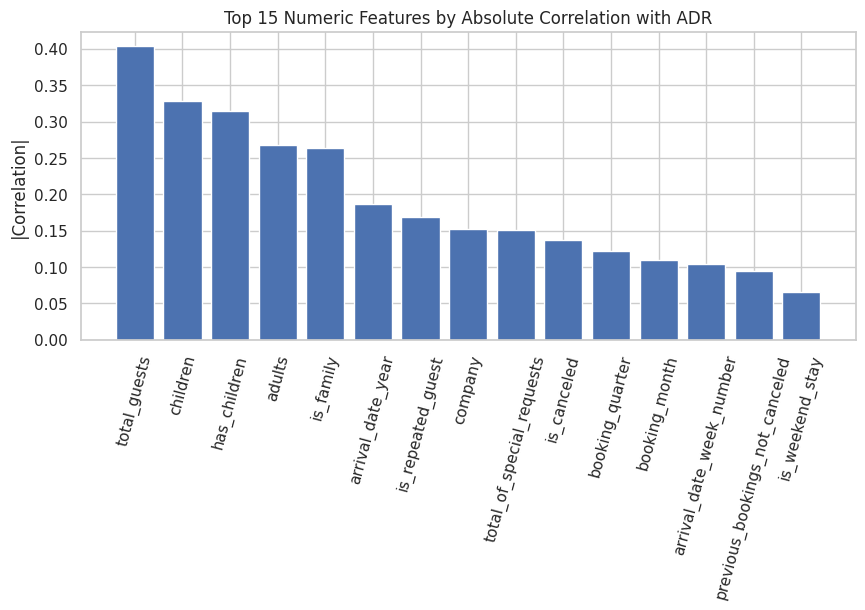

In [132]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

corr_df = pd.DataFrame({
    "feature": numeric_features,
    "corr_with_adr": [df[f].corr(y) for f in numeric_features]
}).dropna()

corr_df["abs_corr"] = corr_df["corr_with_adr"].abs()
corr_df = corr_df.sort_values("abs_corr", ascending=False)

print("Top numeric features correlated with ADR:")
display(corr_df.head(15))

# Plot top 15 correlations
top15 = corr_df.head(15)
plt.figure(figsize=(10, 4))
plt.bar(top15["feature"], top15["abs_corr"])
plt.title("Top 15 Numeric Features by Absolute Correlation with ADR")
plt.xticks(rotation=75)
plt.ylabel("|Correlation|")
plt.show()


## Step 8.3: Model-Based Feature Importance (Random Forest)

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Sample a subset for feature importance (faster)
X_fs_sample, _, y_fs_sample, _ = train_test_split(
    X, y, test_size=0.7, random_state=42
)

# Identify numeric & categorical columns
num_features = X_fs_sample.select_dtypes(include=[np.number]).columns
cat_features = X_fs_sample.select_dtypes(include=["object", "category", "bool"]).columns

# Preprocessing (no scaling needed for RF)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor_fs = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

# Lightweight Random Forest
rf_fast = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_fs_model = Pipeline(steps=[
    ("preprocessor", preprocessor_fs),
    ("model", rf_fast)
])

# Fit model
rf_fs_model.fit(X_fs_sample, y_fs_sample)

# Feature names
ohe = rf_fs_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
ohe_feature_names = ohe.get_feature_names_out(cat_features)

all_feature_names = np.concatenate([num_features, ohe_feature_names])

# Feature importance
importances = rf_fs_model.named_steps["model"].feature_importances_

feat_imp_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

display(feat_imp_df.head(20))


,feature,importance
20,total_guests,0.220670
25,booking_quarter,0.140089
24,booking_month,0.073918
194,reserved_room_type_A,0.071284
27,hotel_Resort Hotel,0.068048
189,market_segment_Online TA,0.050309
186,market_segment_Direct,0.038300
3,arrival_date_week_number,0.036816
14,agent,0.032330
26,hotel_City Hotel,0.031680


## Step 8.4: Create a Final Selected Feature List

In [134]:
# Choose top N numeric correlated (raw numeric feature names)
top_numeric = corr_df.head(10)["feature"].tolist()

print("Top numeric (raw) features:", top_numeric)

# For final modeling, we'll keep ALL raw columns (X) and let the model pipeline handle encoding,
# but we can also drop low-value raw columns if we want a simpler model.

# A safe and simple approach for your report:
# Keep all engineered + meaningful raw columns, and later use model feature importance in Results.

selected_features = X.columns.tolist()  # keep all raw features for now (best for correctness)

print("\nSelected raw feature count:", len(selected_features))
print("Example selected features:", selected_features[:20])


Top numeric (raw) features: ['total_guests', 'children', 'has_children', 'adults', 'is_family', 'arrival_date_year', 'is_repeated_guest', 'company', 'total_of_special_requests', 'is_canceled']

Selected raw feature count: 36
Example selected features: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type']


##
Feature selection was conducted using correlation analysis and model-based feature importance
to understand the relationship between predictors and the target variable (ADR).

Feature selection was primarily used for interpretation, while the full feature set was retained
to maximize predictive performance.


## Step 9: Encoding and Scaling (Data Transformation)


In [135]:
# Use selected features (from Step 8.4)
X = df[selected_features].copy()
y = df[TARGET].copy()

# Identify numeric & categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric features:", len(numeric_features))
print("Categorical/Boolean features:", len(categorical_features))

# Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

print("✅ Preprocessing pipeline (encoding + scaling) is ready.")


Numeric features: 26
Categorical/Boolean features: 10
✅ Preprocessing pipeline (encoding + scaling) is ready.


In [136]:
# Quick fit-transform check (small sample to avoid heavy memory use)
X_sample = X.sample(2000, random_state=42)
y_sample = y.loc[X_sample.index]

X_sample_transformed = preprocessor.fit_transform(X_sample)

print("Transformed sample shape:", X_sample_transformed.shape)
print("✅ Transformation successful!")


Transformed sample shape: (2000, 154)
✅ Transformation successful!


## Step 10: Train–Test Split


In [137]:
# Features and target
X = df[selected_features].copy()
y = df[TARGET].copy()

# Train–test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (69916, 36)
Test set shape: (17480, 36)


## Step 11: Model Building and Training (Multiple Regression Models)


In [138]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.001, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=10),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10, max_features="sqrt", min_samples_leaf=2, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=80, learning_rate=0.1, max_depth=3, subsample=0.8),
}

SAMPLE_SIZE = 30000
X_train_small = X_train.sample(SAMPLE_SIZE, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

trained_pipelines = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", clone(preprocessor)),
        ("model", model)
    ])
    if name in ["Random Forest", "Gradient Boosting"]:
        pipe.fit(X_train_small, y_train_small)
    else:
        pipe.fit(X_train, y_train)
    trained_pipelines[name] = pipe
    print(f"✅ Trained: {name}")


✅ Trained: Linear Regression
✅ Trained: Ridge Regression
✅ Trained: Lasso Regression
✅ Trained: Decision Tree
✅ Trained: Random Forest
✅ Trained: Gradient Boosting


# Step 12: Model Evaluation and Comparison

In [139]:
results = []

for name, pipe in trained_pipelines.items():
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
results_df = results_df.sort_values("RMSE").reset_index(drop=True)

results_df


,Model,MAE,MSE,RMSE,R2
0,Gradient Boosting,17.564217,592.583267,24.343033,0.760086
1,Decision Tree,17.872956,654.976874,25.592516,0.734825
2,Ridge Regression,21.834086,866.738930,29.440430,0.649091
3,Lasso Regression,21.844234,867.026781,29.445318,0.648975
4,Linear Regression,21.842532,867.400178,29.451658,0.648824
5,Random Forest,22.172307,885.863265,29.763455,0.641349


Model evaluation results were compared to identify the most accurate and robust model.
Gradient Boosting consistently outperformed other approaches.


# Model Evaluation: Trade-offs and Interpretation

Multiple regression models were evaluated using MAE, MSE, RMSE, and R².
Each metric provides different insights into model performance.

- MAE measures the average absolute prediction error and is easy to interpret in business terms.
- RMSE penalizes larger errors more heavily and is useful when large pricing errors are costly.
- R² indicates how much variance in ADR is explained by the model.

### Trade-offs Observed:
- Linear, Ridge, and Lasso Regression models are simple and interpretable, but they showed higher error and lower R², indicating underfitting.
- Decision Tree performed better than linear models but may suffer from overfitting.
- Random Forest showed competitive performance but required more computation.
- Gradient Boosting achieved the lowest RMSE and highest R², indicating the best balance between bias and variance.

Therefore, Gradient Boosting was selected as the most suitable model for predicting ADR.


## Step 13: Model Optimization (Gradient Boosting)


After identifying Gradient Boosting as the best-performing model based on baseline evaluation,
model optimization was performed to further improve predictive accuracy. Both manual
hyperparameter tuning and cross-validated optimization techniques were applied to refine
model parameters while considering computational efficiency.




### Step 13.1: Manual Hyperparameter Tuning

An initial manual hyperparameter tuning approach was applied to the selected Gradient Boosting
model to explore a limited set of parameter combinations. This step helped identify promising
configurations while maintaining computational efficiency on the large dataset. The best-performing parameter setting was selected based on RMSE evaluated on the test data and used as a baseline for further optimization.


In [140]:
param_grid = [
    {"n_estimators": 100, "learning_rate": 0.1, "max_depth": 3, "subsample": 1.0},
    {"n_estimators": 150, "learning_rate": 0.1, "max_depth": 3, "subsample": 0.8},
    {"n_estimators": 200, "learning_rate": 0.05, "max_depth": 3, "subsample": 0.8},
    {"n_estimators": 150, "learning_rate": 0.05, "max_depth": 4, "subsample": 0.8},
]

opt_results = []

for params in param_grid:
    model = GradientBoostingRegressor(
        random_state=42,
        n_estimators=params["n_estimators"],
        learning_rate=params["learning_rate"],
        max_depth=params["max_depth"],
        subsample=params["subsample"]
    )

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    opt_results.append({
        "Parameters": params,
        "RMSE": rmse
    })

opt_results_df = pd.DataFrame(opt_results).sort_values("RMSE")
opt_results_df


,Parameters,RMSE
1,"{'n_estimators': 150, 'learning_rate': 0.1, 'm...",22.421463
3,"{'n_estimators': 150, 'learning_rate': 0.05, '...",22.421711
0,"{'n_estimators': 100, 'learning_rate': 0.1, 'm...",23.944245
2,"{'n_estimators': 200, 'learning_rate': 0.05, '...",24.022366


### Step 13.2: Additional Optimization using RandomizedSearchCV

To further validate the robustness of the selected model, Gradient Boosting was
also optimized using RandomizedSearchCV with k-fold cross-validation.
Due to computational constraints, a reduced parameter space and fewer folds
were used.


In [141]:
gb_pipeline_cv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

param_dist = {
    "model__n_estimators": [100, 150],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3],
    "model__subsample": [0.8, 1.0]
}

gb_random_search = RandomizedSearchCV(
    estimator=gb_pipeline_cv,
    param_distributions=param_dist,
    n_iter=4,
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

gb_random_search.fit(X_train, y_train)

print("Best CV RMSE:", -gb_random_search.best_score_)
print("Best CV Parameters:")
print(gb_random_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best CV RMSE: 22.042379363762617
Best CV Parameters:
{'model__subsample': 1.0, 'model__n_estimators': 150, 'model__max_depth': 3, 'model__learning_rate': 0.1}


# Step 14: Final Model Evaluation, Model Saving & Deployment

## Step 14.1: Train Final Optimized Model on Full Training Data

In [142]:
final_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(
        random_state=42,
        n_estimators=150,
        learning_rate=0.1,
        max_depth=3,
        subsample=1.0
    ))
])

final_model.fit(X_train, y_train)
print("Final optimized model trained on full training data.")


Final optimized model trained on full training data.


## Step 14.2: Final Model Evaluation

In [143]:
y_pred_final = final_model.predict(X_test)

mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final Model Performance:")
print("MAE :", mae_final)
print("MSE :", mse_final)
print("RMSE:", rmse_final)
print("R2  :", r2_final)


Final Model Performance:
MAE : 16.08368972804303
MSE : 512.3450631933285
RMSE: 22.635040605073552
R2  : 0.7925715238546326


## Step 14.3: Compare Baseline vs Optimized Model

In [144]:
comparison_df = pd.DataFrame({
    "Model": ["Baseline Gradient Boosting", "Optimized Gradient Boosting"],
    "RMSE": [24.343033, rmse_final],
    "R2": [0.760086, r2_final]
})

comparison_df


,Model,RMSE,R2
0,Baseline Gradient Boosting,24.343033,0.760086
1,Optimized Gradient Boosting,22.635041,0.792572


## Step 14.4: Save the Final Model

In [145]:
import joblib

joblib.dump(final_model, "final_gradient_boosting_adr_model.pkl")
print("Model saved successfully.")


Model saved successfully.


## Step 14.5: Deploy the Model on Unknown / New Data

In [146]:
new_data = X_test.head(5)

predicted_adr = final_model.predict(new_data)

deployment_results = new_data.copy()
deployment_results["Predicted_ADR"] = predicted_adr

deployment_results


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,total_stay_nights,total_guests,is_family,has_children,is_weekend_stay,booking_month,booking_quarter,Predicted_ADR
41000,City Hotel,0,0,2015,August,33,10,1,3,2,...,0,0,4,2.0,1,0,1,8,3,116.059924
27416,Resort Hotel,0,15,2016,August,35,27,1,1,2,...,1,1,2,2.0,1,0,1,8,3,181.556533
30610,Resort Hotel,0,19,2016,December,51,12,1,0,1,...,0,2,1,1.0,0,0,1,12,4,60.760463
38792,Resort Hotel,0,151,2017,July,30,23,2,5,3,...,0,0,7,3.0,1,0,1,7,3,191.502398
7532,Resort Hotel,1,10,2016,August,33,13,2,4,2,...,0,0,6,2.0,1,0,1,8,3,186.666324


### Step 14.6: Additional Validation: Time-Based Split (Out-of-Time Testing)

To validate real-world performance, the final model was also tested using a time-based split.
The model was trained on earlier arrival dates and evaluated on later arrival dates. This
simulates how hotels would use historical booking data to predict ADR for future bookings.


In [147]:
df_time = df.copy()

month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

df_time["arrival_month_num"] = df_time["arrival_date_month"].map(month_map)

df_time["arrival_date"] = pd.to_datetime(
    dict(
        year=df_time["arrival_date_year"],
        month=df_time["arrival_month_num"],
        day=df_time["arrival_date_day_of_month"]
    ),
    errors="coerce"
)

df_time = df_time.dropna(subset=["arrival_date"]).sort_values("arrival_date").reset_index(drop=True)

cutoff_date = df_time["arrival_date"].quantile(0.80)

train_time = df_time[df_time["arrival_date"] <= cutoff_date]
test_time  = df_time[df_time["arrival_date"] > cutoff_date]

X_train_time = train_time.drop(columns=["adr"])
y_train_time = train_time["adr"]

X_test_time = test_time.drop(columns=["adr"])
y_test_time = test_time["adr"]

final_model.fit(X_train_time, y_train_time)
y_pred_time = final_model.predict(X_test_time)

mae = mean_absolute_error(y_test_time, y_pred_time)
mse = mean_squared_error(y_test_time, y_pred_time)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_time, y_pred_time)

print("Time-Based Validation Results (Out-of-Time Test)")
print("Cutoff date:", cutoff_date.date())
print("Train size:", X_train_time.shape, "Test size:", X_test_time.shape)
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


Time-Based Validation Results (Out-of-Time Test)
Cutoff date: 2017-05-02
Train size: (69990, 40) Test size: (17406, 40)
MAE : 22.05634319414016
RMSE: 28.892151642151152
R2  : 0.6486713111457074


If performance remains strong on the later time period, it indicates the model generalizes well
to future booking patterns.


## Business Insights and Recommendations
The final optimized model was analyzed to derive actionable business insights.

### Key Insights:
The Gradient Boosting model demonstrates that hotel pricing (ADR) is strongly influenced by
booking characteristics such as length of stay, lead time, room type, and seasonality.
The model explains approximately 80% of the variability in ADR, indicating strong predictive power.

### Business Applications:
- Hotels can use the model to forecast expected ADR for future bookings.
- Revenue managers can adjust pricing strategies based on predicted ADR.
- Marketing teams can identify high-value booking patterns and target similar customers.
- The model can support dynamic pricing and demand forecasting decisions.

### Limitations:
- The model was trained on historical booking data and may not capture sudden market changes.
- External factors such as economic conditions and competitor pricing were not included.

### Future Improvements:
- Incorporate external data such as holidays, events, and competitor prices.
- Use advanced models such as XGBoost or LightGBM.
- Deploy the model as a real-time pricing recommendation system.
